In [1]:
# Plot the verification against IFS:
# Plot bias/rmse in 2D map (lat-lon) and zonal mean plot
# initial built: 2024/09/23

import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import netCDF4 as nc
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy
print(cartopy.__version__)

0.21.1


In [2]:
datahome    = '/scratch2/GFDL/gfdlscr/Chih-Chi.Hu/GribDiag/ush/plotgribnc/data/gribnc'

timerange = '2022061500_2022072000_12'
expname   = 'ctrl-ctrl_noinf'
exps = expname.split('-')

ncdir = f'{datahome}/IFS/{timerange}/{expname}'

In [3]:
# read netcdfs:
rmse_r = {}; rmse_t={}; rmse_u={}; rmse_v={};
bias_r = {}; bias_t={}; bias_u={}; bias_v={};

for exp in exps:  
    fn_rmse = nc.Dataset(f"{ncdir}/rmse_{exp}_f06.nc")
    lat = fn_rmse.variables['latitude'][:]
    lon = fn_rmse.variables['longitude'][:]
    lev = fn_rmse.variables['level'][:]
    rmse_r[exp] = fn_rmse.variables['r'][:]
    rmse_t[exp] = fn_rmse.variables['t'][:]
    rmse_u[exp] = fn_rmse.variables['u'][:]
    rmse_v[exp] = fn_rmse.variables['v'][:]

    fn_bias = nc.Dataset(f"{ncdir}/bias_{exp}_f06.nc")
    bias_r[exp] = fn_bias.variables['r'][:]
    bias_t[exp] = fn_bias.variables['t'][:]
    bias_u[exp] = fn_bias.variables['u'][:]
    bias_v[exp] = fn_bias.variables['v'][:]

In [113]:
lev

masked_array(data=[  10,   20,   50,  100,  150,  200,  250,  300,  400,
                    500,  700,  850,  925, 1000],
             mask=False,
       fill_value=999999,
            dtype=int32)

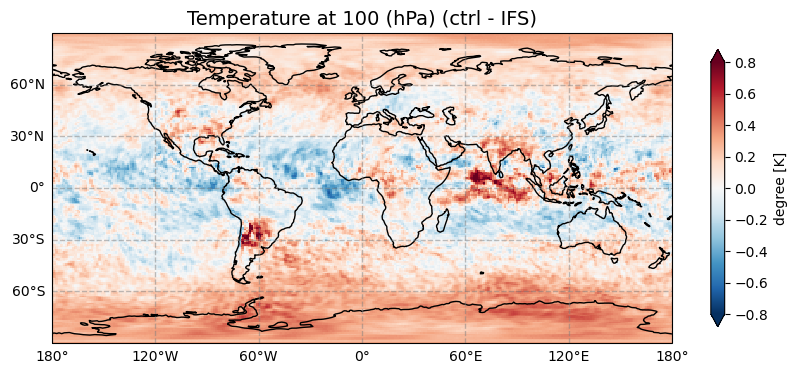

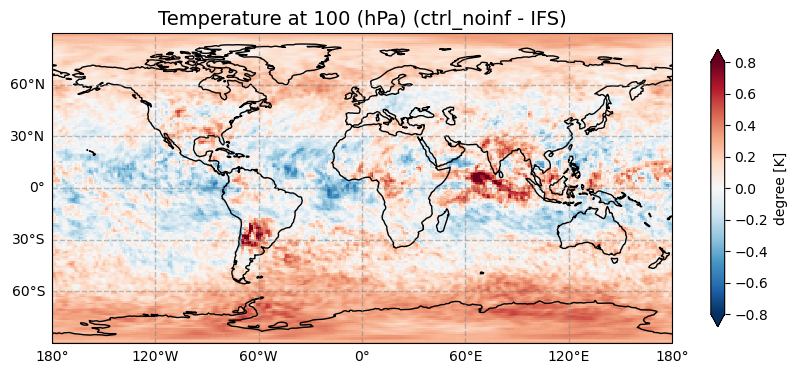

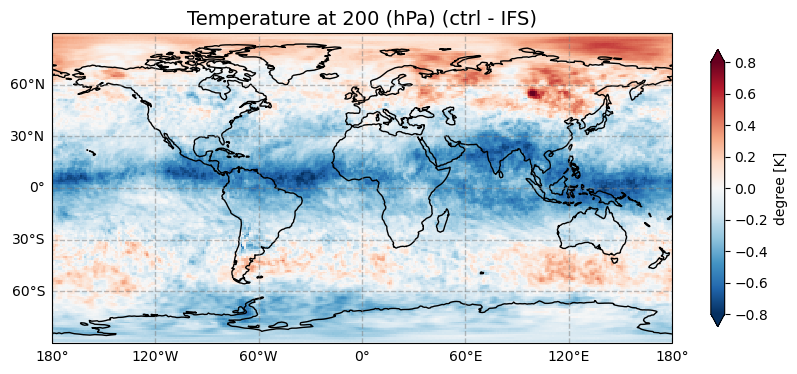

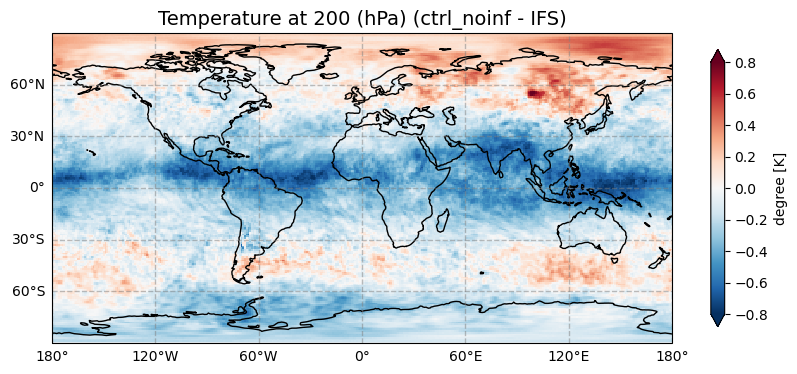

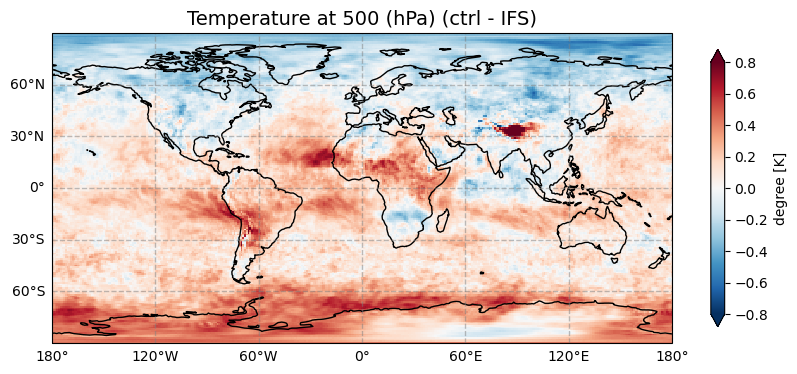

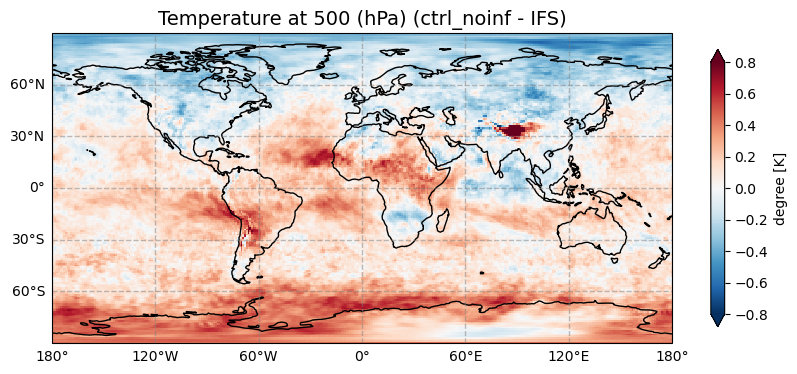

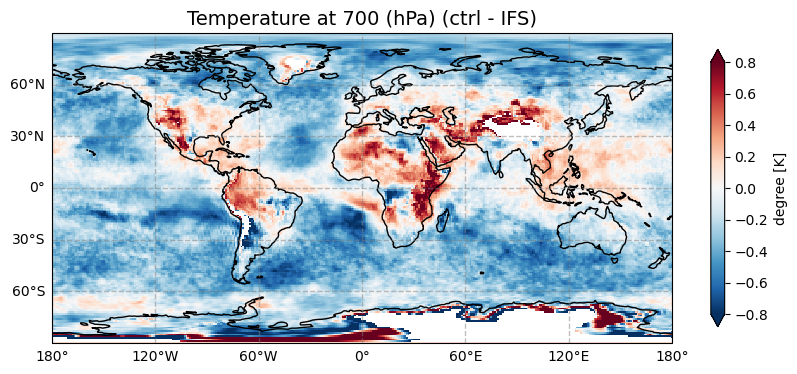

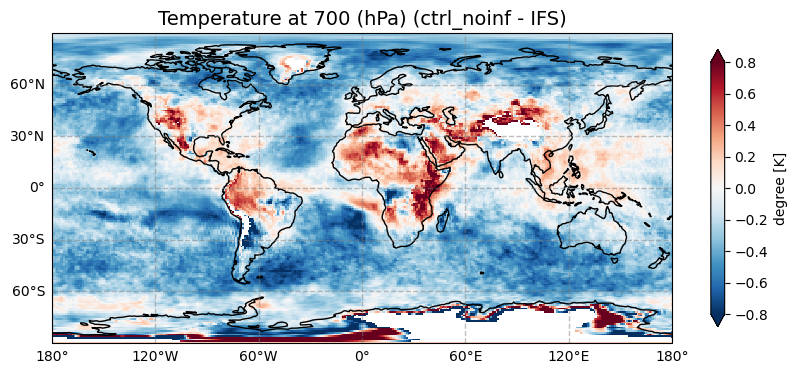

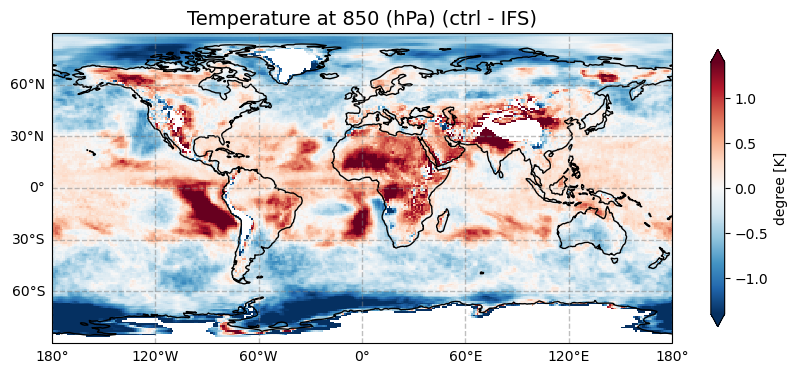

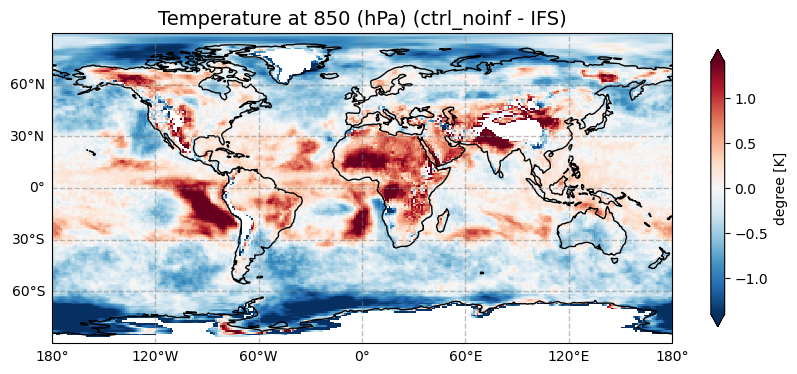

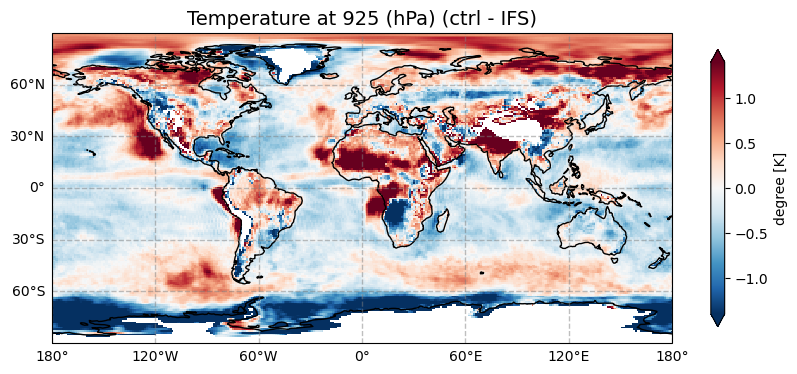

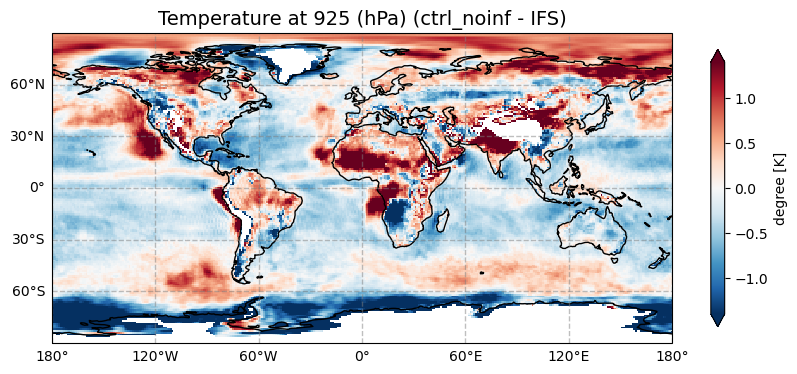

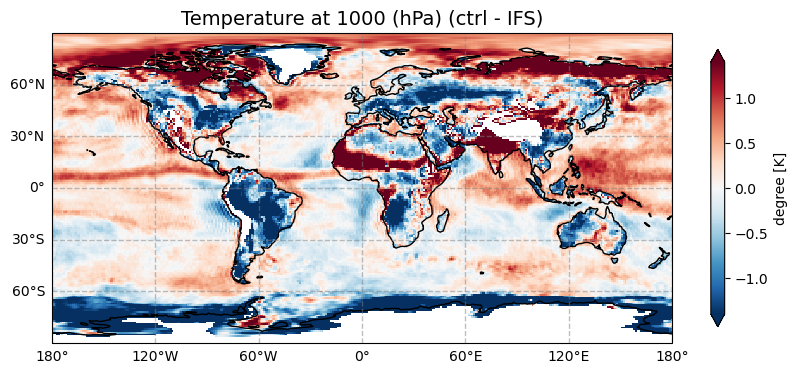

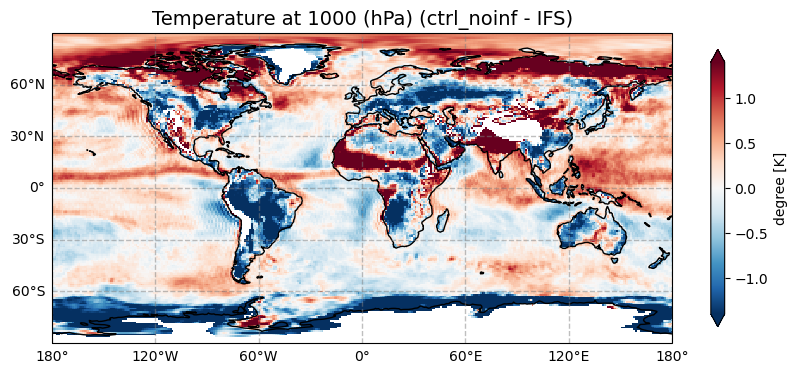

In [118]:
# plot 2D map Temperature bias (exp - reanalysis) for specified levels:

plt_height = [100., 200., 500., 700., 850., 925., 1000.]
#plt_height = [1000.]
plt_height_idx = np.where(np.isin(lev, plt_height))

lats, lons = np.meshgrid(lat, lon)

for h_idx in plt_height_idx[0]:
    for exp in exps:
        if lev[h_idx] <= 700:
            vmax_norm =  0.8
            vmin_norm = -0.8
        else:
            vmax_norm =  1.4
            vmin_norm = -1.4            
        
        fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()},figsize=(10,6))
        ax.coastlines()
        plt_vars = np.squeeze(bias_t[exp][h_idx,:,:].transpose())
        contour  = ax.pcolormesh(lons, lats, plt_vars, cmap='RdBu_r', vmin=vmin_norm, vmax=vmax_norm)
        ax.set_title(f'Temperature at {lev[h_idx]} (hPa) ({exp} - IFS)', fontsize=14)
        gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
        gl.top_labels = False  # Hide labels on the top side
        gl.right_labels = False  # Hide labels on the right side    

        # set colorbar
        cbar = plt.colorbar(contour, ax=ax, extend='both', orientation='vertical', shrink=0.6) # Adjust the shrink parameter as needed
        cbar.set_label('degree [K]')
        plt.savefig(f"IFS_2dmap_{lev[h_idx]}_rmse_T_{exp}.png")


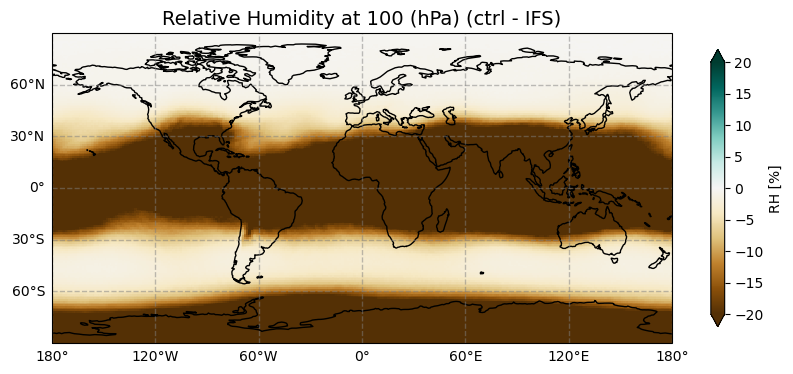

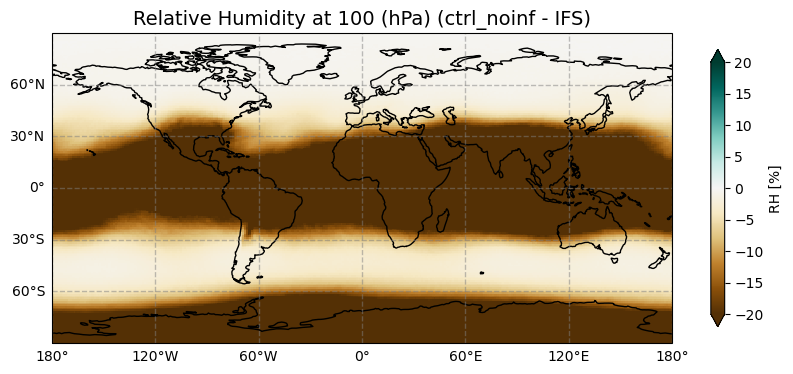

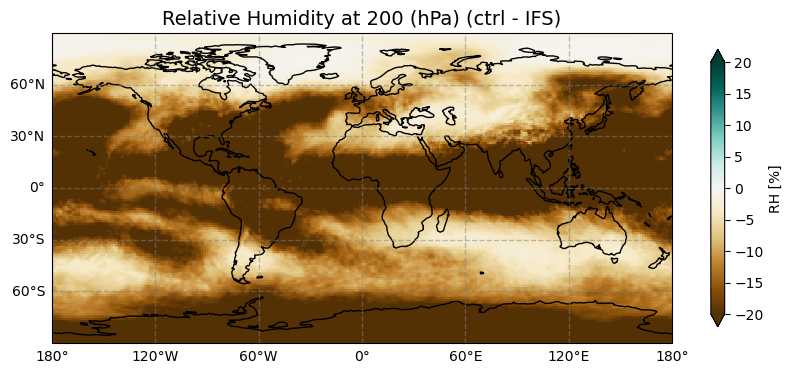

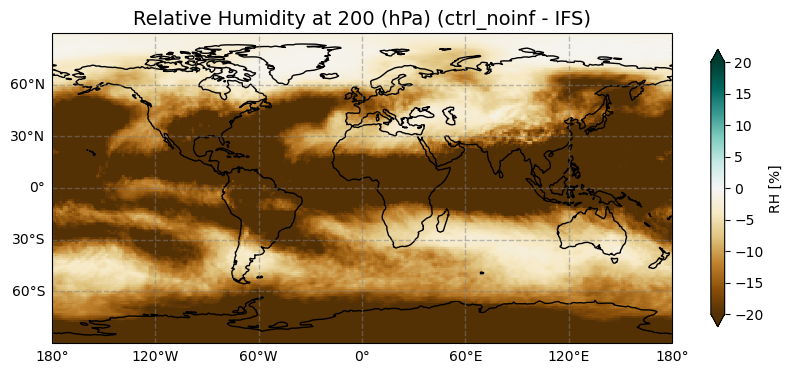

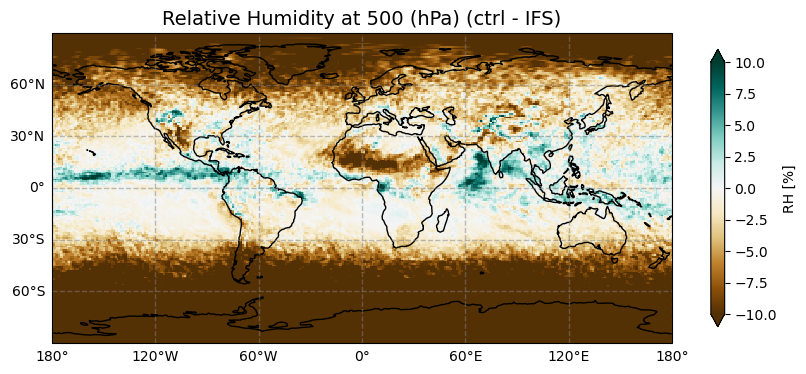

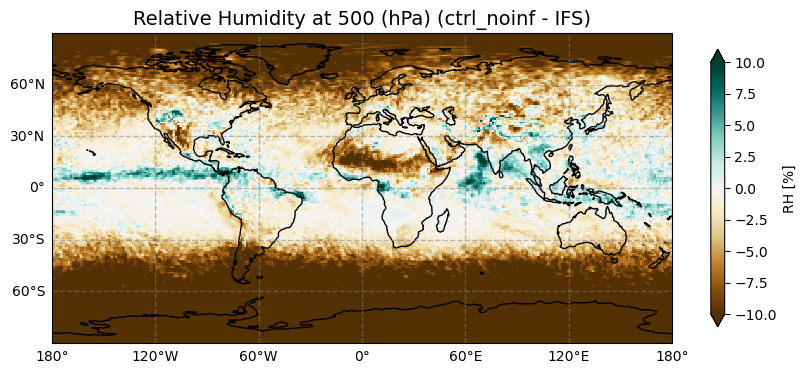

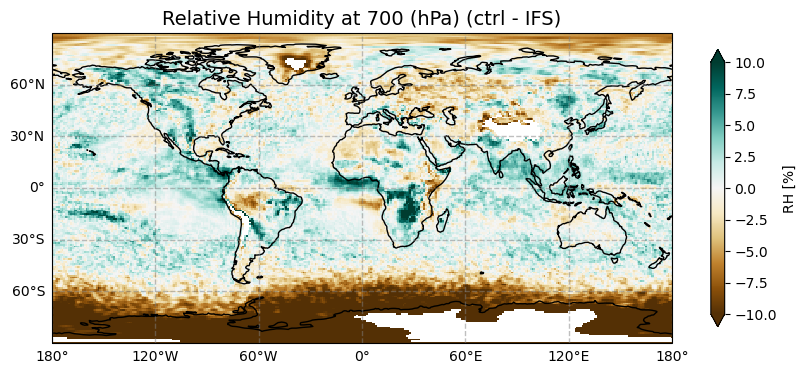

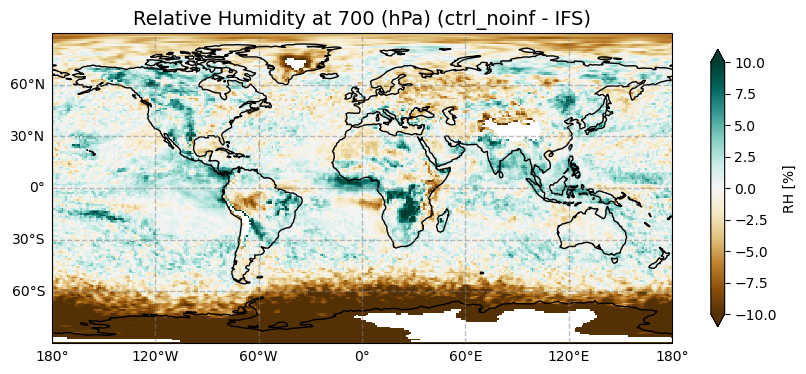

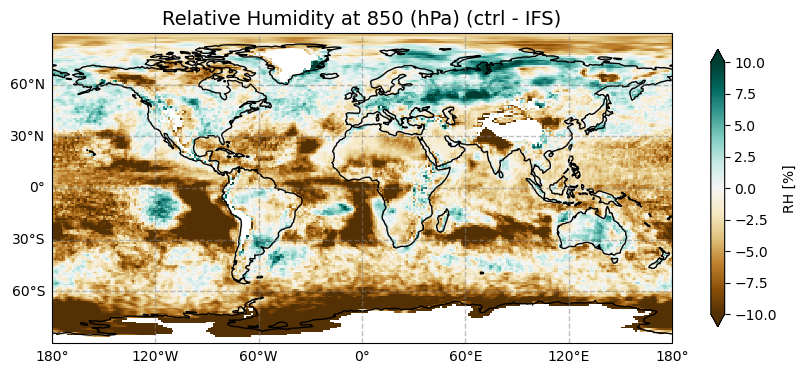

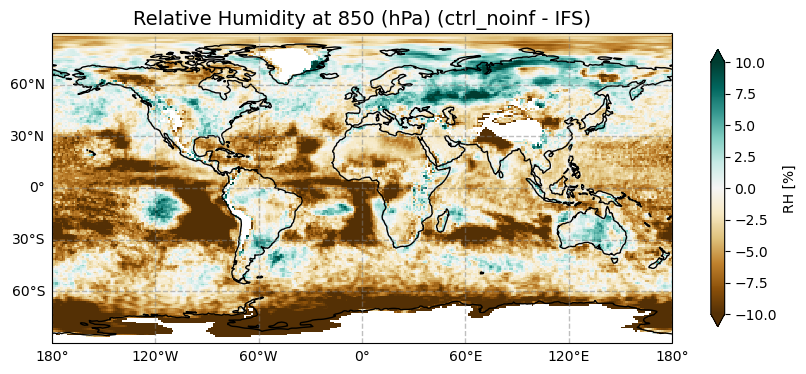

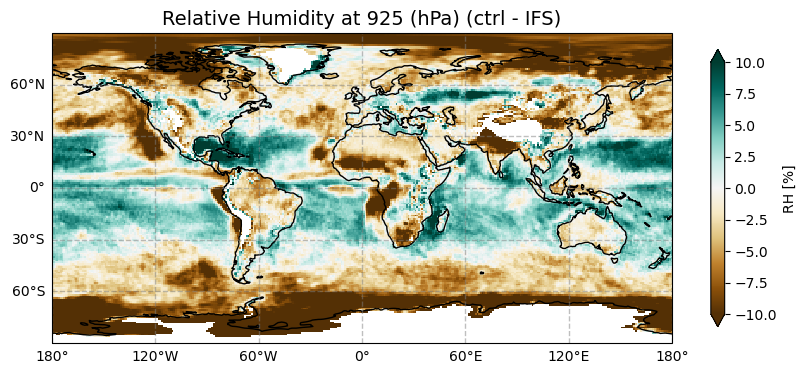

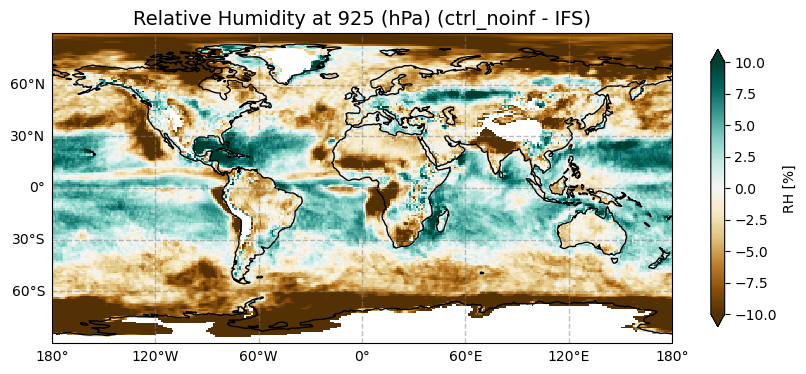

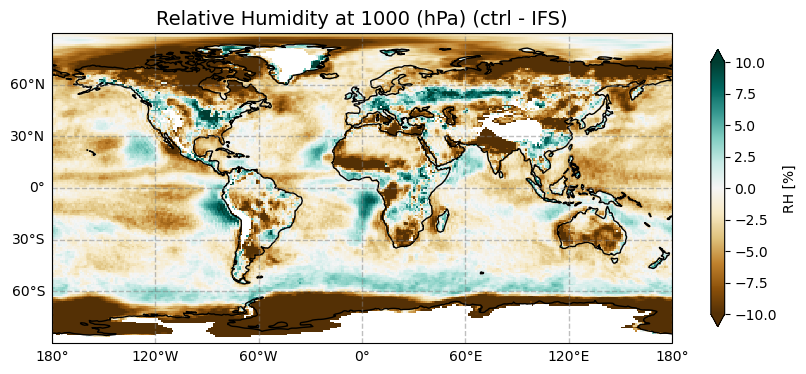

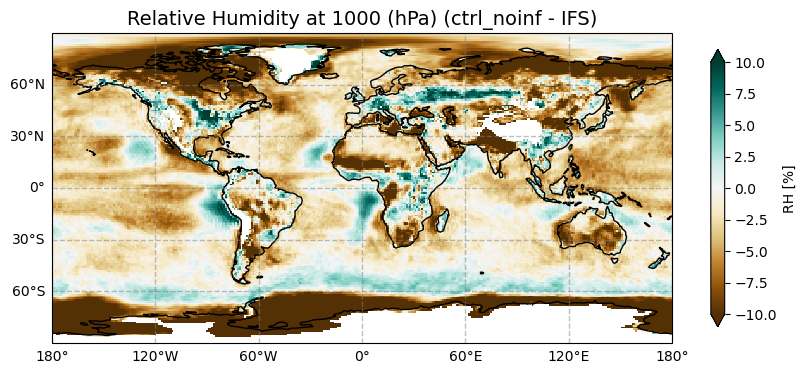

In [4]:
# plot 2D map Humidity bias (exp - reanalysis) for specified levels:

plt_height = [100., 200., 500., 700., 850., 925., 1000.]
#plt_height = [1000.]
plt_height_idx = np.where(np.isin(lev, plt_height))

lats, lons = np.meshgrid(lat, lon)

for h_idx in plt_height_idx[0]:
    for exp in exps:
        if lev[h_idx] <= 200:
            vmax_norm =  20
            vmin_norm = -20
        else:
            vmax_norm =  10
            vmin_norm = -10            
        
        fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()},figsize=(10,6))
        ax.coastlines()
        plt_vars = np.squeeze(bias_r[exp][h_idx,:,:].transpose())
        contour  = ax.pcolormesh(lons, lats, plt_vars, cmap='BrBG', vmin=vmin_norm, vmax=vmax_norm)
        ax.set_title(f'Relative Humidity at {lev[h_idx]} (hPa) ({exp} - IFS)', fontsize=14)
        gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
        gl.top_labels = False  # Hide labels on the top side
        gl.right_labels = False  # Hide labels on the right side    

        # set colorbar
        cbar = plt.colorbar(contour, ax=ax, extend='both', orientation='vertical', shrink=0.6) # Adjust the shrink parameter as needed
        cbar.set_label('RH [%]')
        
        plt.savefig(f"IFS_2dmap_{lev[h_idx]}_rmse_RH_{exp}.png")


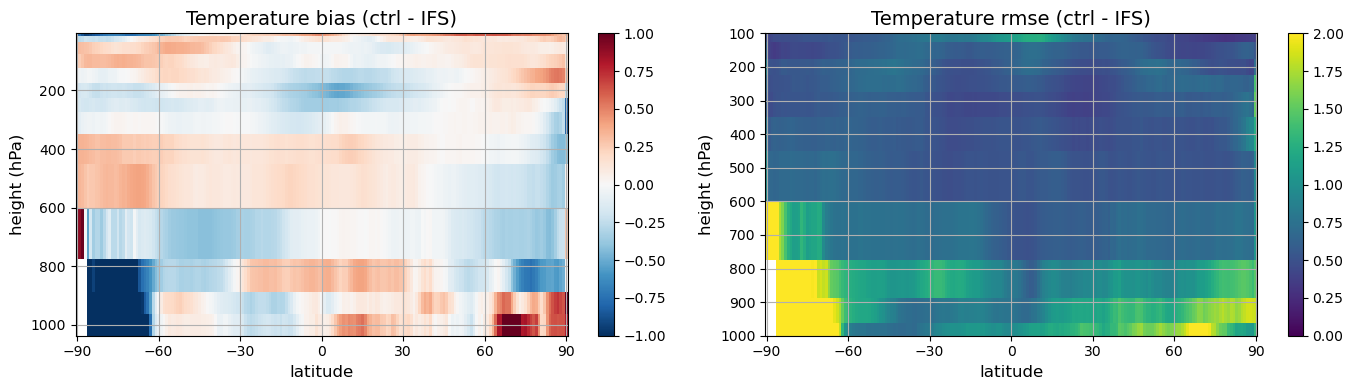

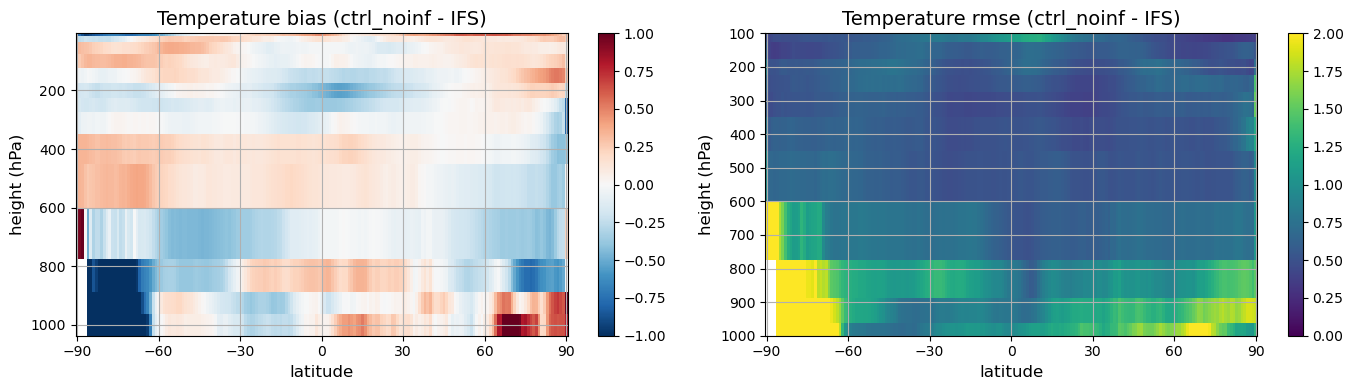

In [124]:
# zonal mean plot Temperature bias and rmse (exp - reanalysis):

lats, levs = np.meshgrid(lat, lev)

zbias_t = {};
zrmse_t = {};
for exp in exps:
    zbias_t[exp] = np.mean(bias_t[exp], axis=2)
    zrmse_t[exp] = np.mean(rmse_t[exp], axis=2)

vmin_norm = -1
vmax_norm =  1
vmax_rmse =  2

for exp in exps:
    # figure size:
    fig = plt.figure(figsize=(14,4))

    # define the subplots
    ax1 = fig.add_subplot(1, 2, 1)  # Add subplot at position 1
    ax2 = fig.add_subplot(1, 2, 2)  # Add subplot at position 2

    # ax1: 
    contour1=ax1.pcolormesh(lats, levs, zbias_t[exp], cmap='RdBu_r', vmin=vmin_norm, vmax=vmax_norm)
    ax1.invert_yaxis()
    ax1.set_xlabel('latitude',fontsize=12)
    ax1.set_xticks([-90,-60,-30,0,30,60,90])
    ax1.set_ylabel('height (hPa)',fontsize=12)
    ax1.set_title(f'Temperature bias ({exp} - IFS)', fontsize=14)
    ax1.grid(True)
    # set colorbar
    cbar = fig.colorbar(contour1,location='right',aspect=20)

    # ax2: 
    contour2 = ax2.pcolormesh(lats, levs, zrmse_t[exp], cmap='viridis', vmin=0, vmax=vmax_rmse)
    ax2.invert_yaxis()
    ax2.set_xlabel('latitude',fontsize=12)
    ax2.set_xticks([-90,-60,-30,0,30,60,90])
    ax2.set_ylabel('height (hPa)',fontsize=12)
    ax2.set_title(f'Temperature rmse ({exp} - IFS)', fontsize=14)
    ax2.set_ylim(1000,100)
    ax2.grid(True)
    # set colorbar
    cbar = fig.colorbar(contour2,location='right',aspect=20)
    
    plt.tight_layout()
    plt.savefig(f"IFS_zonal_rmse_bias_T_{exp}.png")


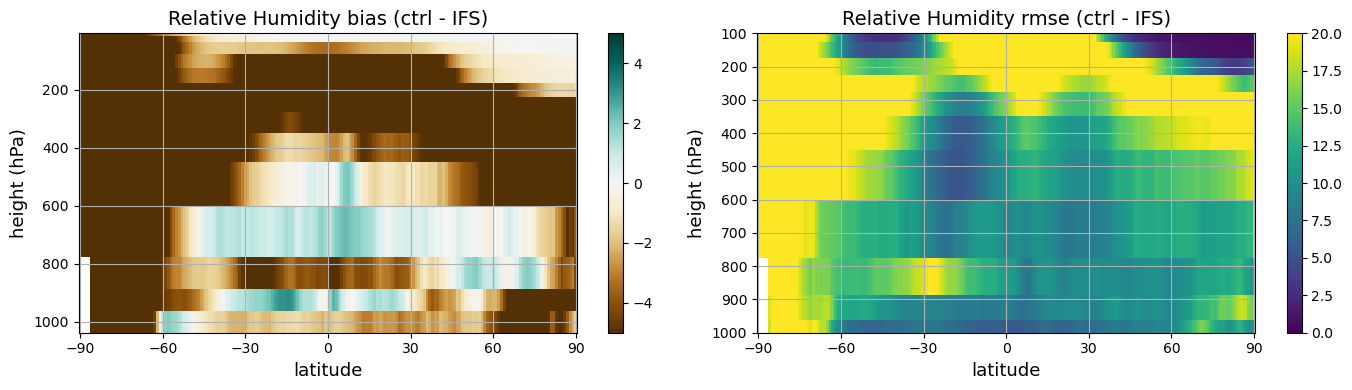

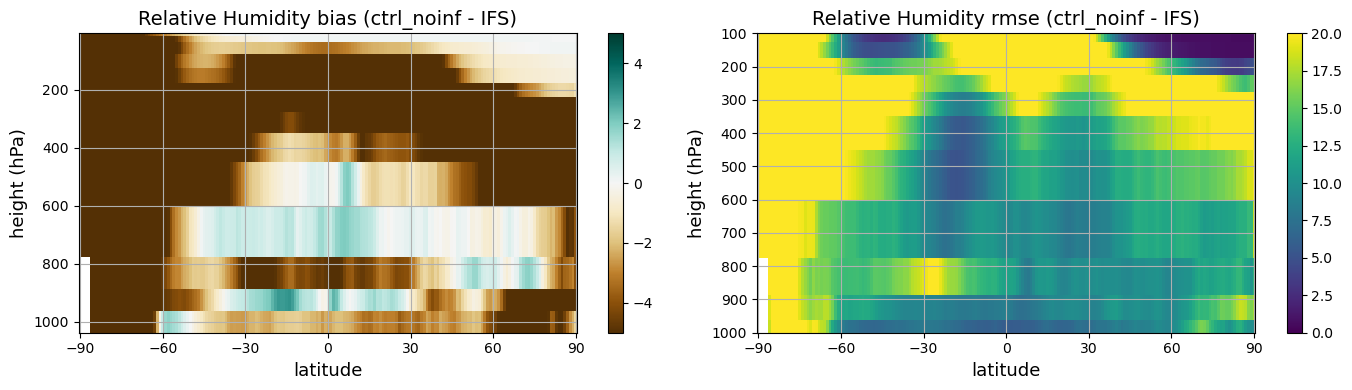

In [5]:
# zonal mean plot Humidity bias and rmse (exp - reanalysis):

lats, levs = np.meshgrid(lat, lev)

zbias_r = {};
zrmse_r = {};
for exp in exps:
    zbias_r[exp] = np.mean(bias_r[exp], axis=2)
    zrmse_r[exp] = np.mean(rmse_r[exp], axis=2)

vmin_norm = -5
vmax_norm =  5
vmax_rmse =  20

for exp in exps:
    # figure size:
    fig = plt.figure(figsize=(14,4))

    # define the subplots
    ax1 = fig.add_subplot(1, 2, 1)  # Add subplot at position 1
    ax2 = fig.add_subplot(1, 2, 2)  # Add subplot at position 2

    # ax1: 
    contour1=ax1.pcolormesh(lats, levs, zbias_r[exp], cmap='BrBG', vmin=vmin_norm, vmax=vmax_norm)
    ax1.invert_yaxis()
    ax1.set_xlabel('latitude',fontsize=13)
    ax1.set_xticks([-90,-60,-30,0,30,60,90])
    ax1.set_ylabel('height (hPa)',fontsize=13)
    ax1.set_title(f'Relative Humidity bias ({exp} - IFS)', fontsize=14)
    ax1.grid(True)
    # set colorbar
    cbar = fig.colorbar(contour1,location='right',aspect=20)

    # ax2: 
    contour2 = ax2.pcolormesh(lats, levs, zrmse_r[exp], cmap='viridis', vmin=0, vmax=vmax_rmse)
    ax2.invert_yaxis()
    ax2.set_xlabel('latitude',fontsize=13)
    ax2.set_xticks([-90,-60,-30,0,30,60,90])
    ax2.set_ylabel('height (hPa)',fontsize=13)
    ax2.set_title(f'Relative Humidity rmse ({exp} - IFS)', fontsize=14)
    ax2.set_ylim(1000,100)
    ax2.grid(True)
    # set colorbar
    cbar = fig.colorbar(contour2,location='right',aspect=20)
    
    plt.tight_layout()
    plt.savefig(f"IFS_zonal_rmse_bias_RH_{exp}.png")

In [ ]:
#lons.shape
plt_vars.shape
plt_height_idx[0]